In [1]:
import numpy as np
import xarray as xr
import dask as da
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib notebook

Question here is what does iso

<IPython.core.display.Javascript object>


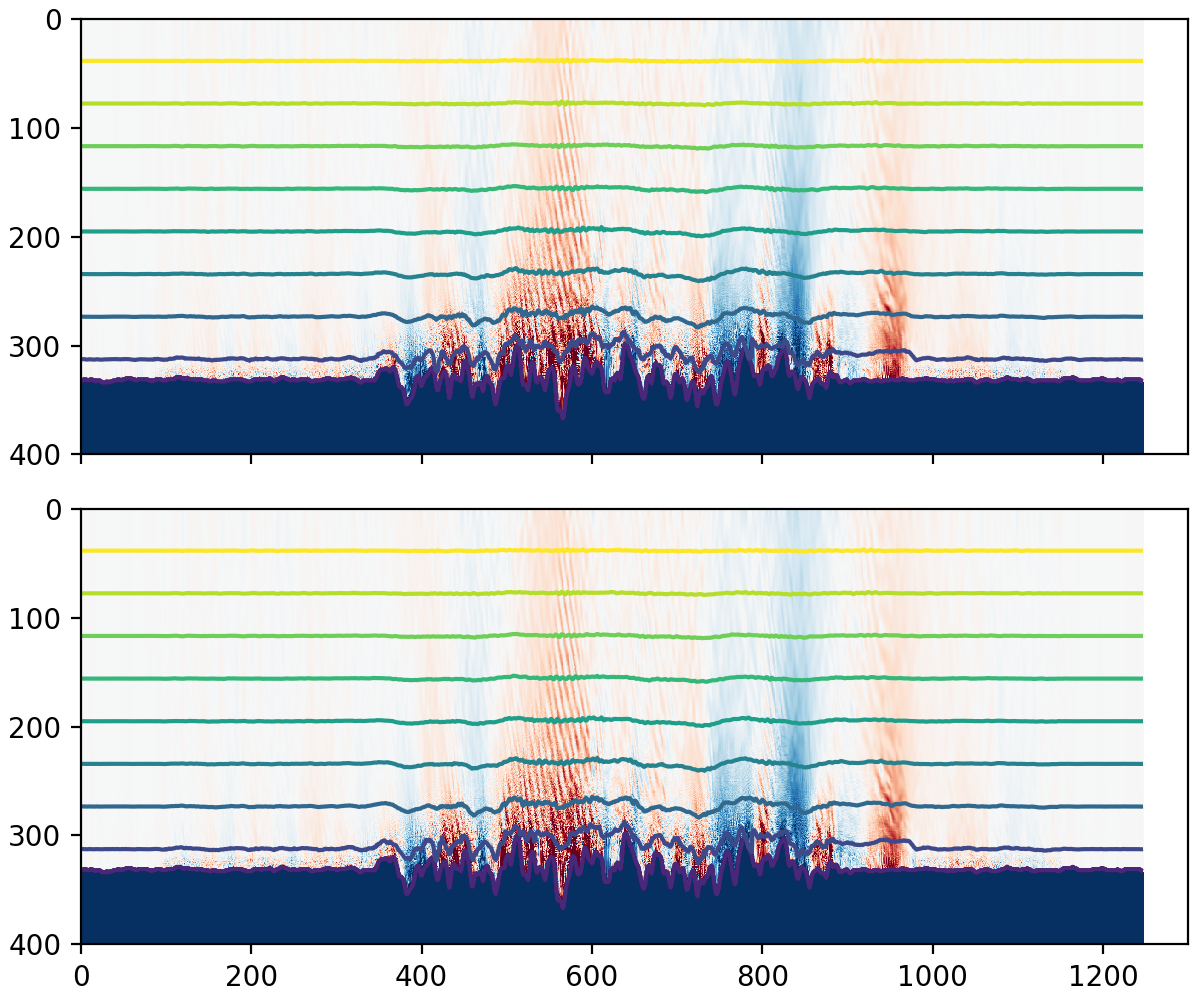

In [12]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6,5), constrained_layout=True)
for nn, f in enumerate(['../reduceddata/AllSliceLW1kmLongSponge10U305Redo.nc', '../reduceddata/AllSliceLW1kmLongSponge10U305.nc']):
    fn = f
    ax = axs[nn]
    with xr.open_dataset(fn) as ds:
        dss = ds.isel(record=1)
        ax.pcolormesh(dss.UVEL-0.1,  vmin=-0.1, vmax=0.1, cmap='RdBu_r')
        ax.contour(dss.THETA, levels=np.arange(26, 28, 0.2))
        ax.set_title('')
        ax.set_ylim(400,0)
        ax.set_xlim(00, 1300)


<IPython.core.display.Javascript object>


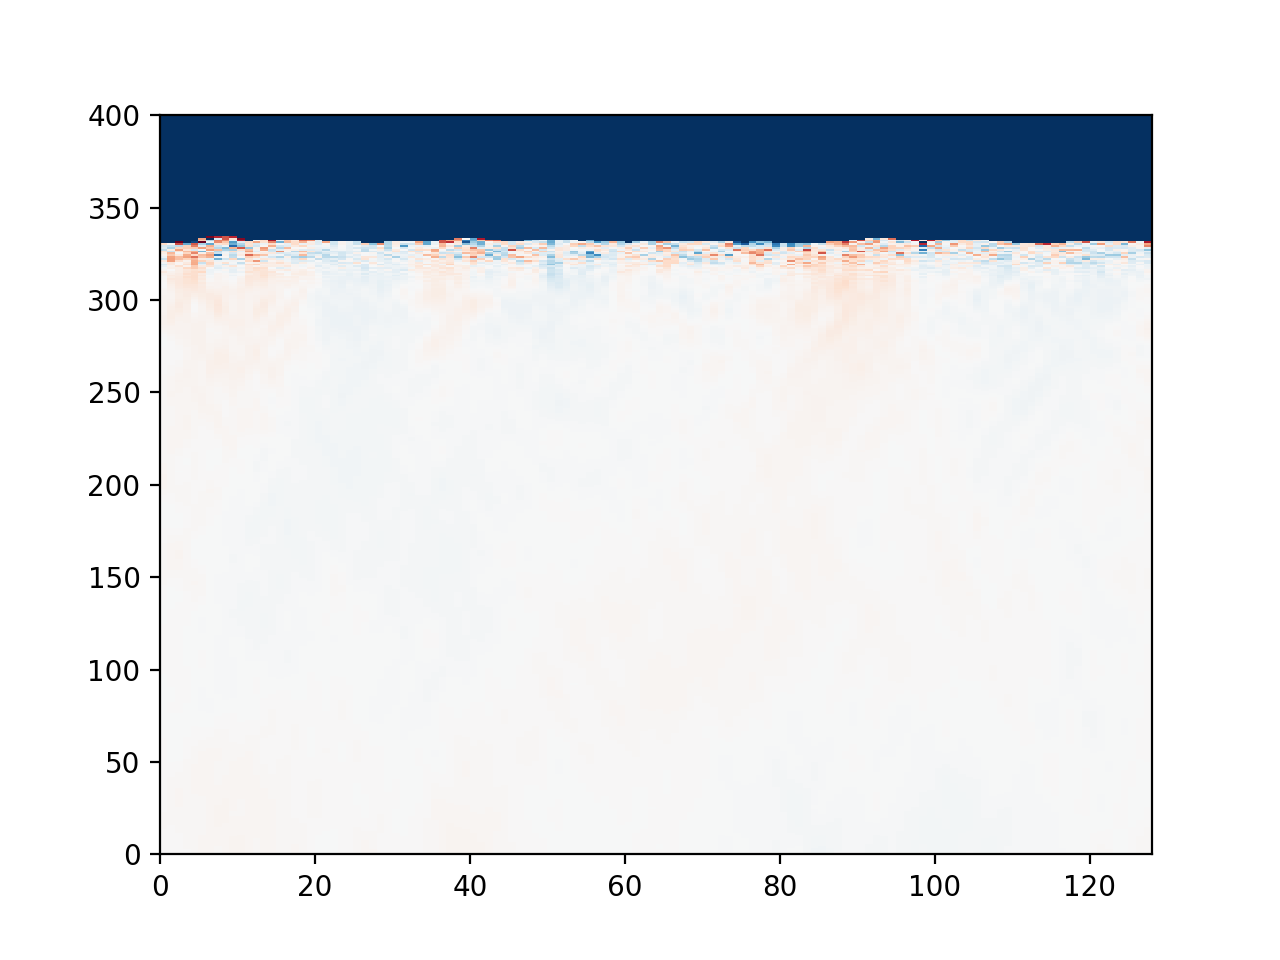

In [17]:
fn = '../reduceddata/X200SliceLW1kmLongSponge10U305Redo.nc'
fig, ax = plt.subplots()
with xr.open_dataset(fn) as ds:
    dss = ds.isel(record=1)
    ax.pcolormesh(dss.UVEL - 0.1, vmin=-0.1, vmax=0.1, cmap='RdBu_r')

<IPython.core.display.Javascript object>


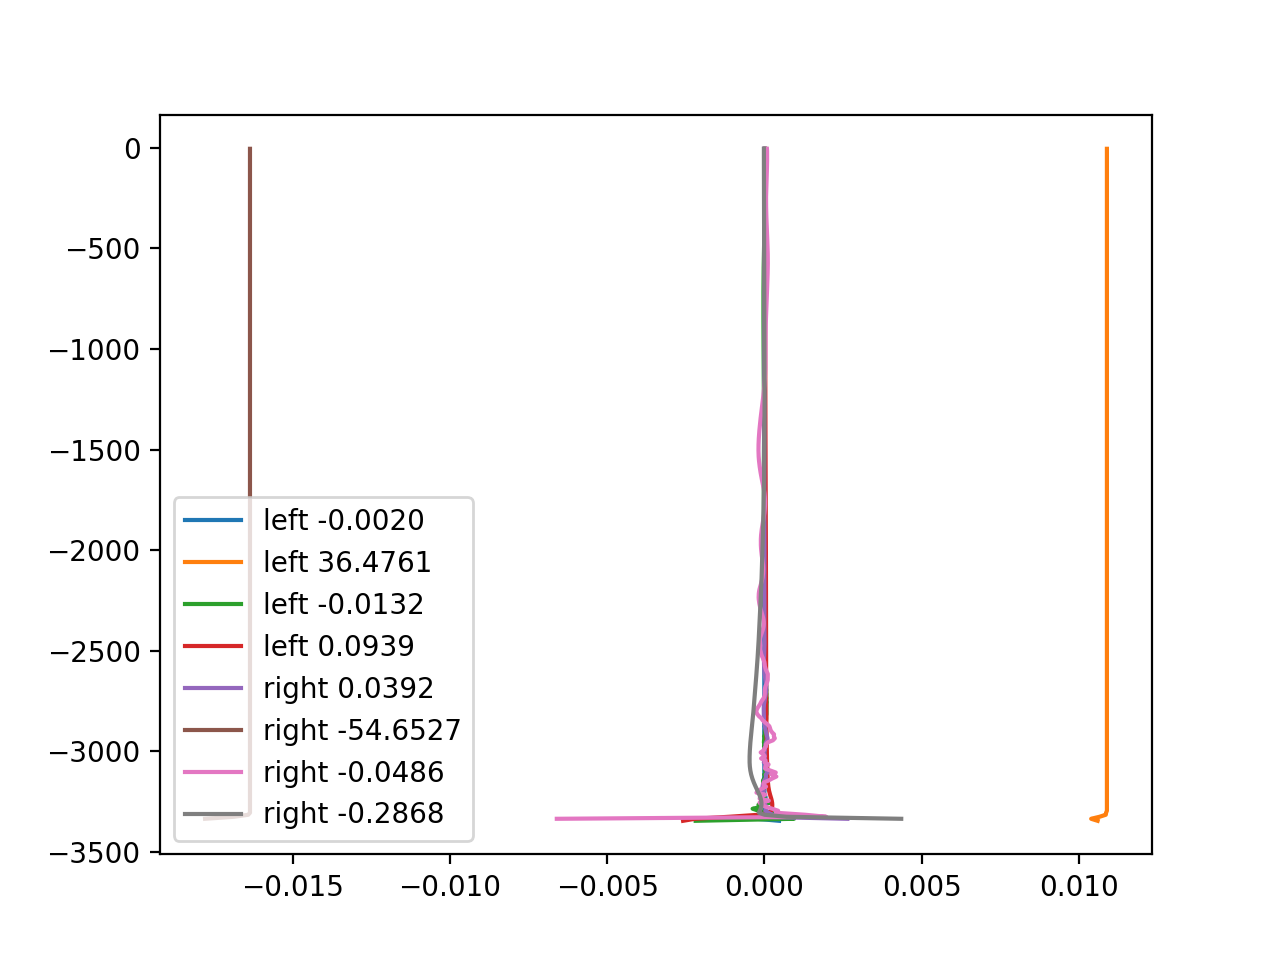

[0.00012992416007541474 0.00013088998622291792 0.00013112621921450296
 0.00013011199301096732 0.00013000863122079875 0.0001298534157161274
 0.00012960158630143104 0.000129916857130985 0.0001305269298348538
 0.00013073217039137608]
0.01111678238440221
[-0.00013989393705560182 -0.00013972510740709043 -0.00013815022303098612
 -0.0001369437591925704 -0.0001367469495441309 -0.0001406037914139513
 -0.00014159199789115506 -0.000140141967641505 -0.00013989596008967542
 -0.00013886940153251537]
-0.016692430353571396


In [64]:
f = ['../reduceddata/X200SliceLW1kmLongSponge10U305Redo.nc', 
     '../reduceddata/X200RSliceLW1kmLongSponge10U305Redo.nc']
f2d = ['../reduceddata/X2002dSliceLW1kmLongSponge10U305Redo.nc', 
     '../reduceddata/X200R2dSliceLW1kmLongSponge10U305Redo.nc']
fig, ax = plt.subplots()
for fn, fn2d, la in zip(f, f2d, ['left', 'right']):
    with xr.open_dataset(fn) as ds:
        with xr.open_dataset(fn2d) as ds2d:
            dss = ds.isel(record=2)
            dss2d = ds2d.isel(record=2)
            U = np.ma.masked_where(dss.THETA==0, dss.UVEL.data)
            P = np.ma.masked_where(dss.THETA==0, dss.PHIHYD.data)
            Pp = P - dss2d.ETAN.data * 9.8
            print(Pp[1,:10])
            Up = U - U.mean(axis=0)
            UpPp = Up * Pp
            ax.plot(UpPp.mean(axis=1), dss.Z, label=la+' %1.4f'% np.sum(UpPp.mean(axis=1)*10))
            UbPb = np.mean((U-Up), axis=0) * np.mean((P-Pp), axis=0) + 0*U
            ax.plot(UbPb.mean(axis=1), dss.Z, label=la+' %1.4f'% np.sum(UbPb.mean(axis=1)*10))
            UpPb = (Up) * (P-Pp)
            ax.plot(UpPb.mean(axis=1), dss.Z, label=la+' %1.4f'% np.sum(UpPb.mean(axis=1)*10))
            UbPp = (U-Up) * (Pp)
            ax.plot(UbPp.mean(axis=1), dss.Z, label=la+' %1.4f'% np.sum(UbPp.mean(axis=1)*10))
            etaU =  U.mean(axis=0) * dss2d.ETAN.data * 3350 * 9.8
            print(dss2d.ETAN.data.mean())
        
ax.legend()

In [41]:
dss.PHIBOT

AssertionError: internal failure: file must be open if `autoclose=True` is used.

<IPython.core.display.Javascript object>


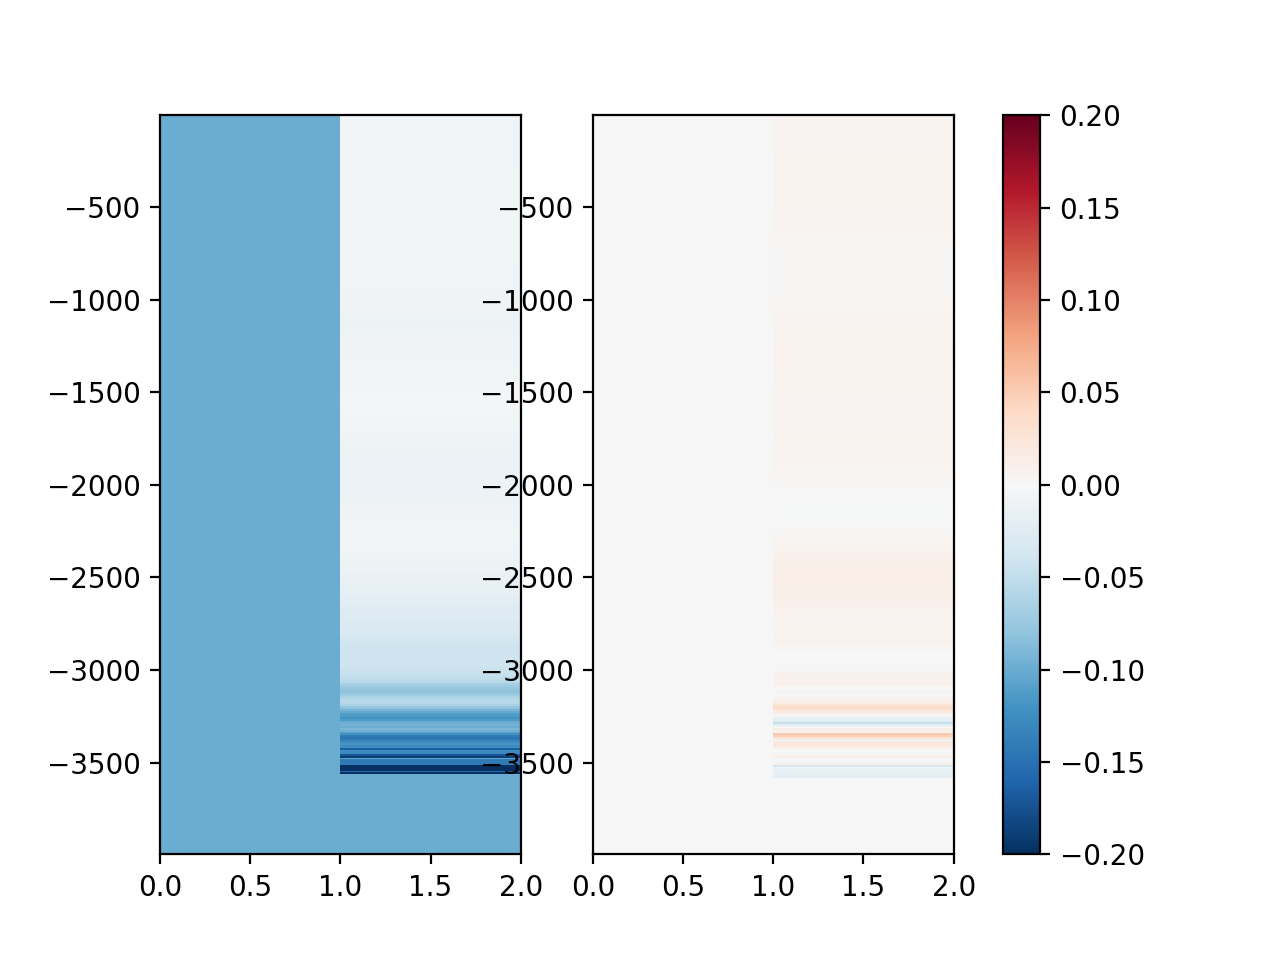

<xarray.Dataset>
Dimensions:    (k: 400, k_l: 400, k_p1: 401, k_u: 400, record: 3)
Coordinates:
  * record     (record) int32 1 2 3
    i          int32 200
    i_g        int32 200
    j          int32 10
    j_g        int32 10
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_l        (k_l) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    XC         float64 1.974e+05
    XG         float64 1.969e+05
    YC         float64 9.712e+03
    YG         float64 9.25e+03
Data variables:
    iter       (record) int32 0 7200 14400
    time       (record) timedelta64[ns] 0 days 00:00:00 4 days 04:00:00 ...
    Depth      float64 3.58e+03
    Z          (k) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    Zu         (k_u) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80

In [44]:
fig, axs = plt.subplots(1,2)
norm = mcolors.Normalize(vmin=-0.2, vmax=0.2)
with xr.open_dataset('../reduceddata/AllSliceLW1kmlowU10Amp305f038.nc') as dss:
    ds = dss
    print(ds)
    ax = axs[0]
    pc = ax.pcolormesh(np.arange(len(ds.iter)), ds.Z, ds.UVEL.data.T-0.1, norm=norm, cmap='RdBu_r')
    ax = axs[1]
    pc = ax.pcolormesh(np.arange(len(ds.iter)), ds.Z, ds.VVEL.data.T, norm=norm, cmap='RdBu_r')
fig.colorbar(pc, ax=axs)

<class 'numpy.ndarray'>


In [5]:
print(ds)

NameError: name 'ds' is not defined

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-129.26564830749288


<IPython.core.display.Javascript object>


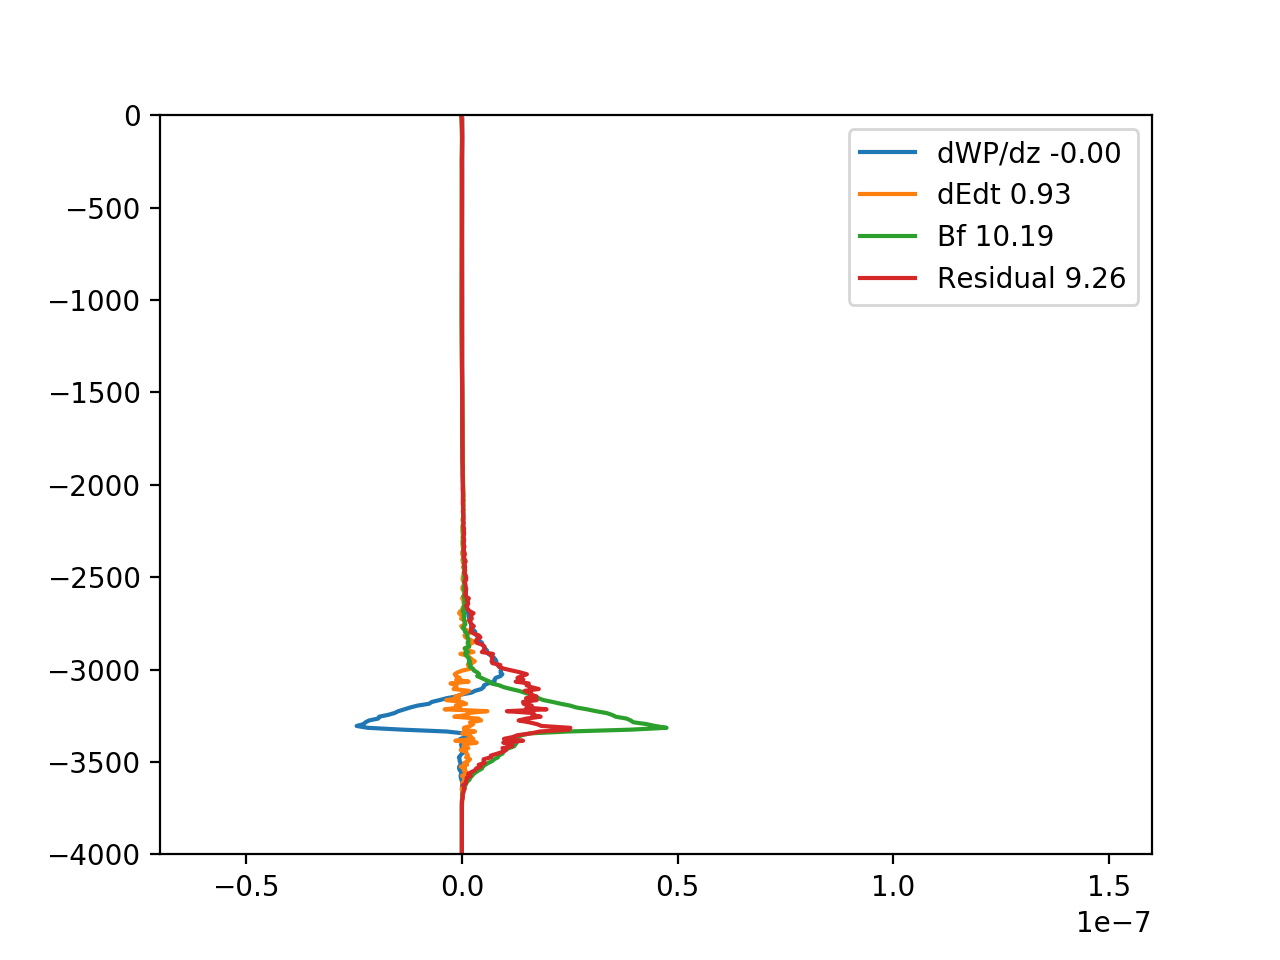

In [10]:
with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmLongSponge10U305Redo.nc') as en:
    print(en)
    print(-en.dWPdz.sum().values * 10)
    area2 = en.area / 1e6
    fig, ax = plt.subplots()
    ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
    ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
    ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
    ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))
    ax.set_ylim(-4000, 000)
    ax.legend()
    ax.set_xlim([-0.7e-7, 1.6e-7])

## get totals

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-9.820272219759918


<IPython.core.display.Javascript object>


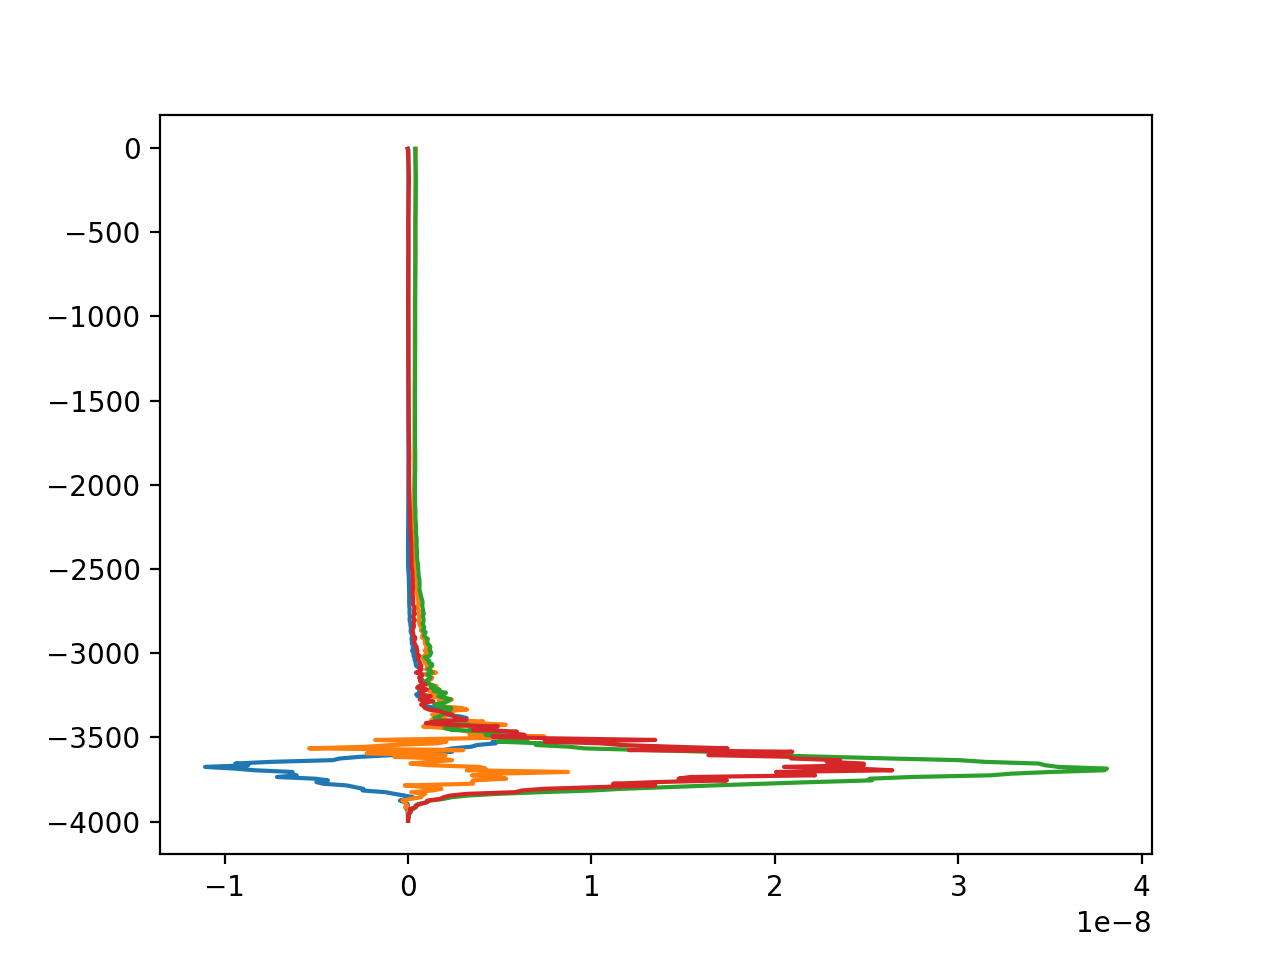

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-34.72646221000443


<IPython.core.display.Javascript object>


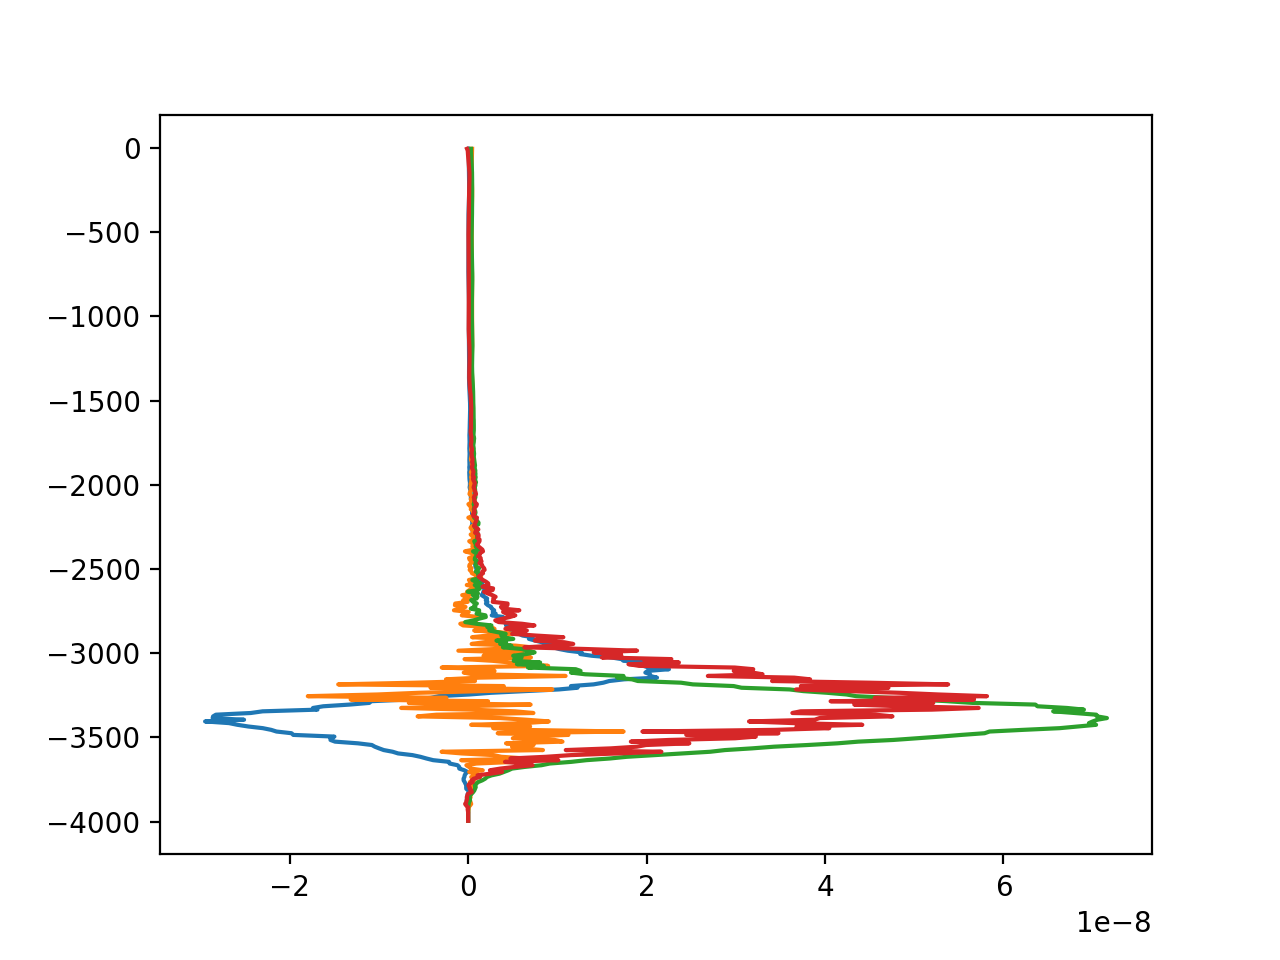

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
142.95473329342914


<IPython.core.display.Javascript object>


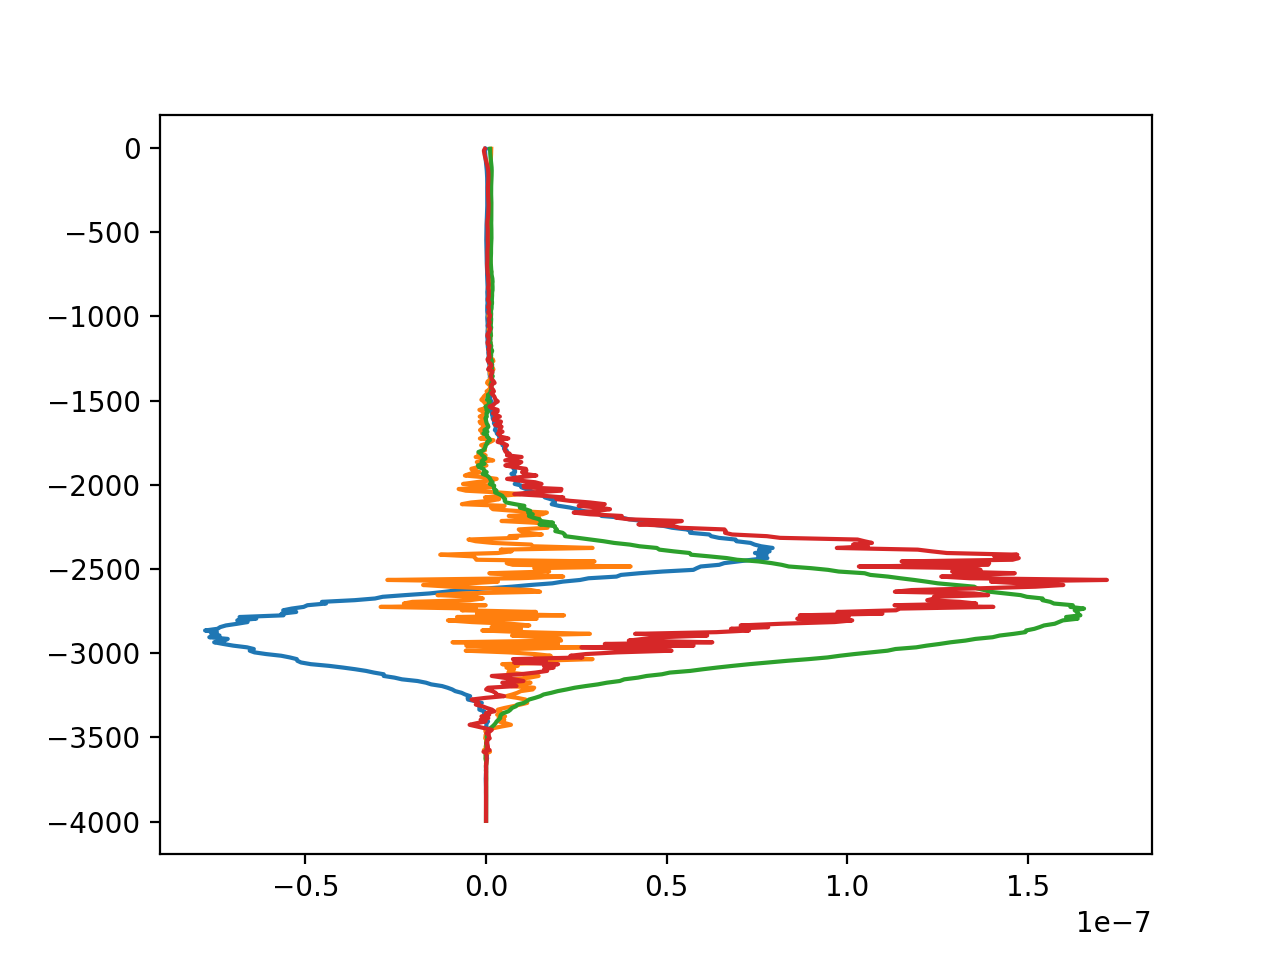

In [4]:
amps = np.array([155, 305, 610])
Bf = 0. * amps
for num, a in enumerate(amps):
    
    with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp%03dK18.nc' % a) as en:
        print(en)
        print(-en.dWPdz.sum().values * 10)
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))


<IPython.core.display.Javascript object>


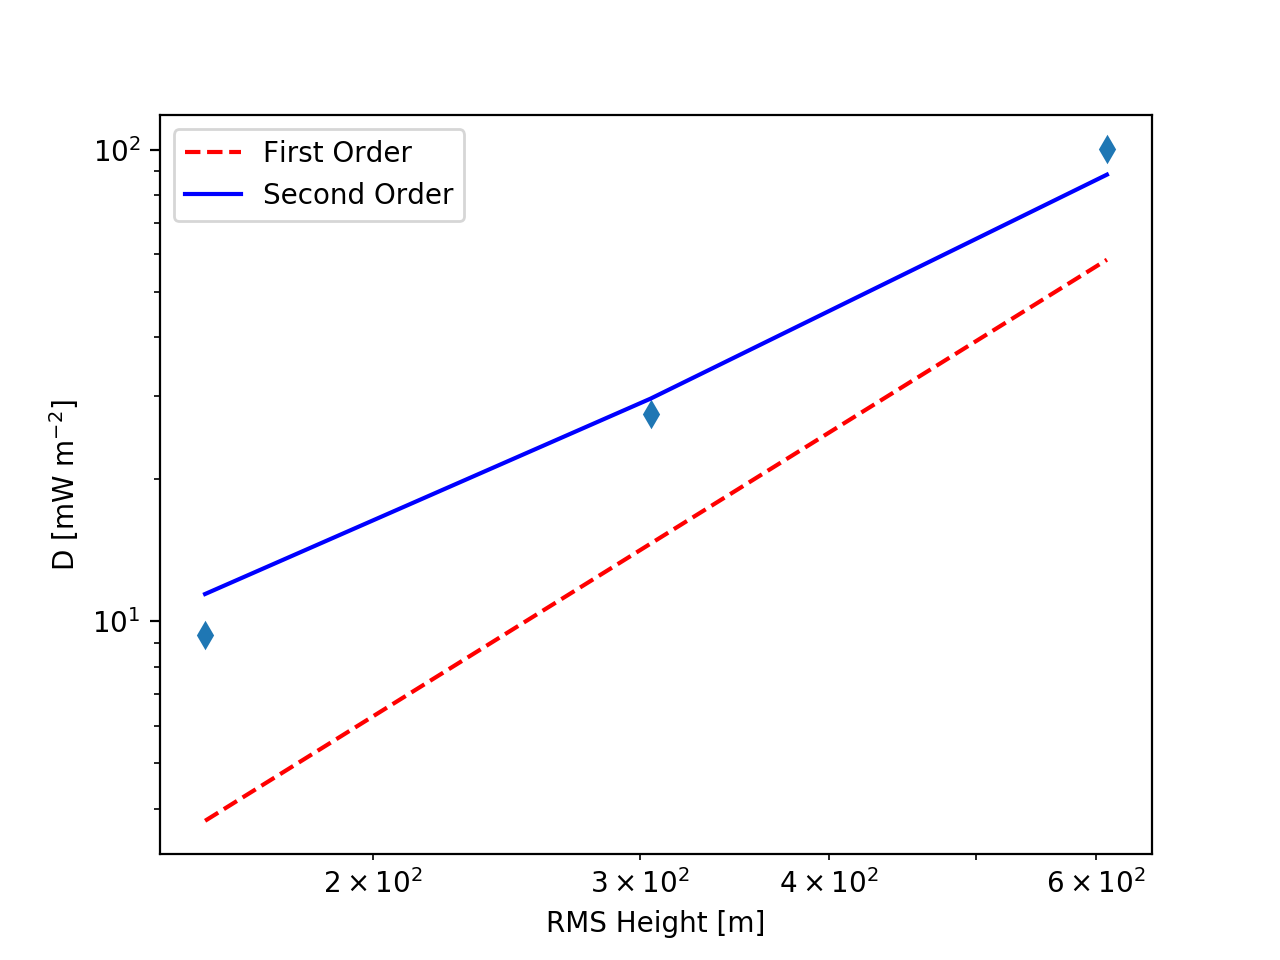

[0.64516129 0.32786885 0.16393443]
[1.55 3.05 6.1 ]


In [12]:
fig, ax = plt.subplots()
ax.loglog(amps, Bf, 'd')
#ax.loglog(amps, Bf[0] * amps**2/amps[0]**2, 'k--')
#ax.loglog(amps, Bf[0] * amps/amps[0], 'k--')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
N = 1e-3
U0 = 0.1

guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.loglog(amps, guess0, 'r--', label='First Order')

UNh = U0 / N / (amps)
print(UNh)
print(1./UNh)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.loglog(amps, guess1, 'b', label='Second Order')
ax.set_ylabel('D $[\mathrm{mW\ m^{-2}}]$')
ax.set_xlabel('RMS Height [m]')
ax.legend()


In [20]:
ds.WVEL[:, 20, 20]

<xarray.DataArray 'WVEL' (k_l: 400)>
array([  0.000000e+00,   1.931900e-05,   3.814881e-05, ...,   0.000000e+00,
         0.000000e+00,   0.000000e+00])
Coordinates:
    record   int32 2
    i        int32 20
    j        int32 20
  * k_l      (k_l) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    XC       float64 2.018e+04
    YC       float64 1.896e+04
Attributes:
    description:  Vertical Component of Velocity (r_units/s)
    units:        m/s

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-22.07327866053228


<IPython.core.display.Javascript object>


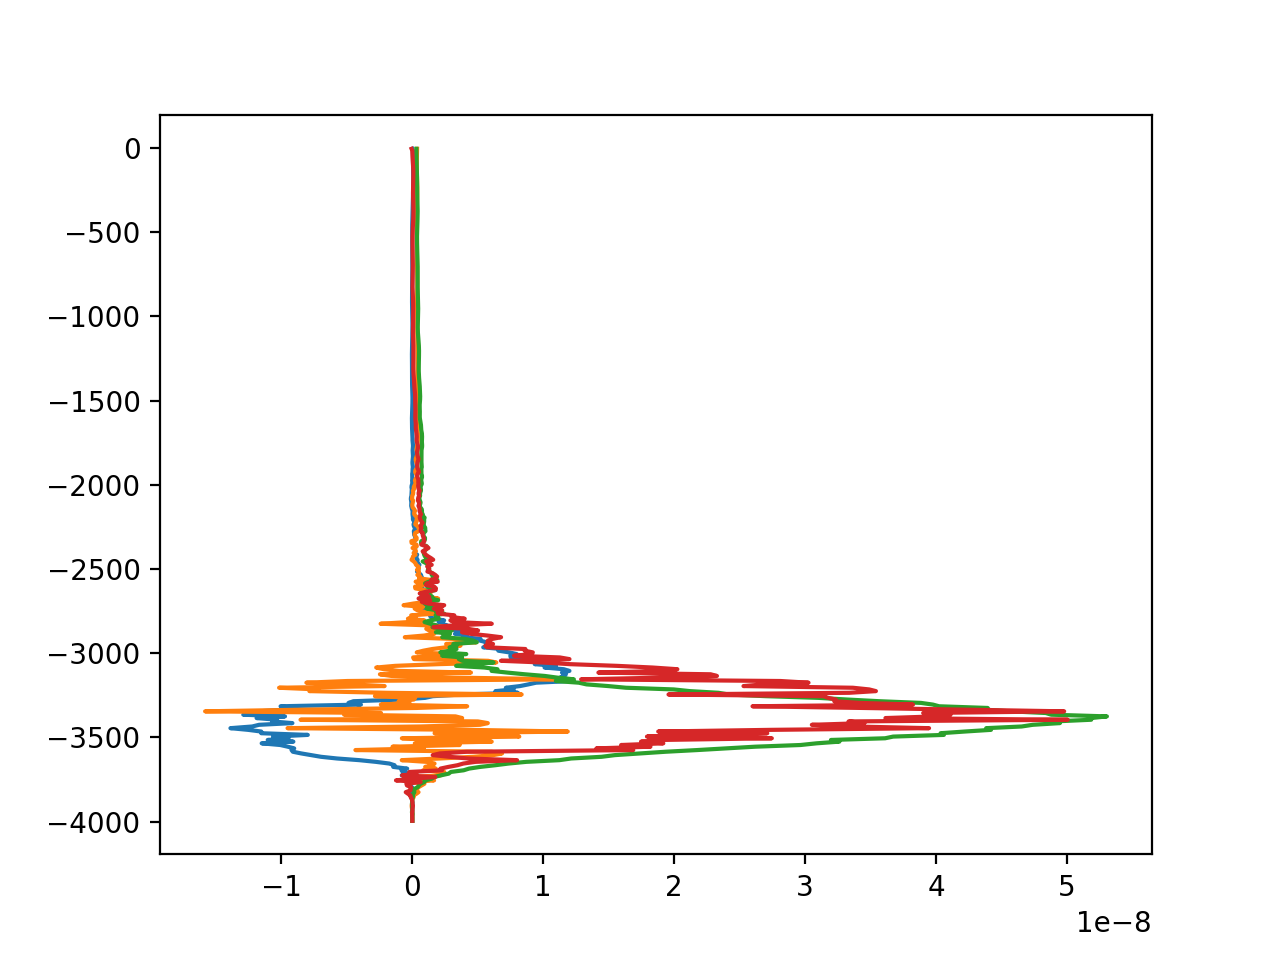

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-34.72646221000443


<IPython.core.display.Javascript object>


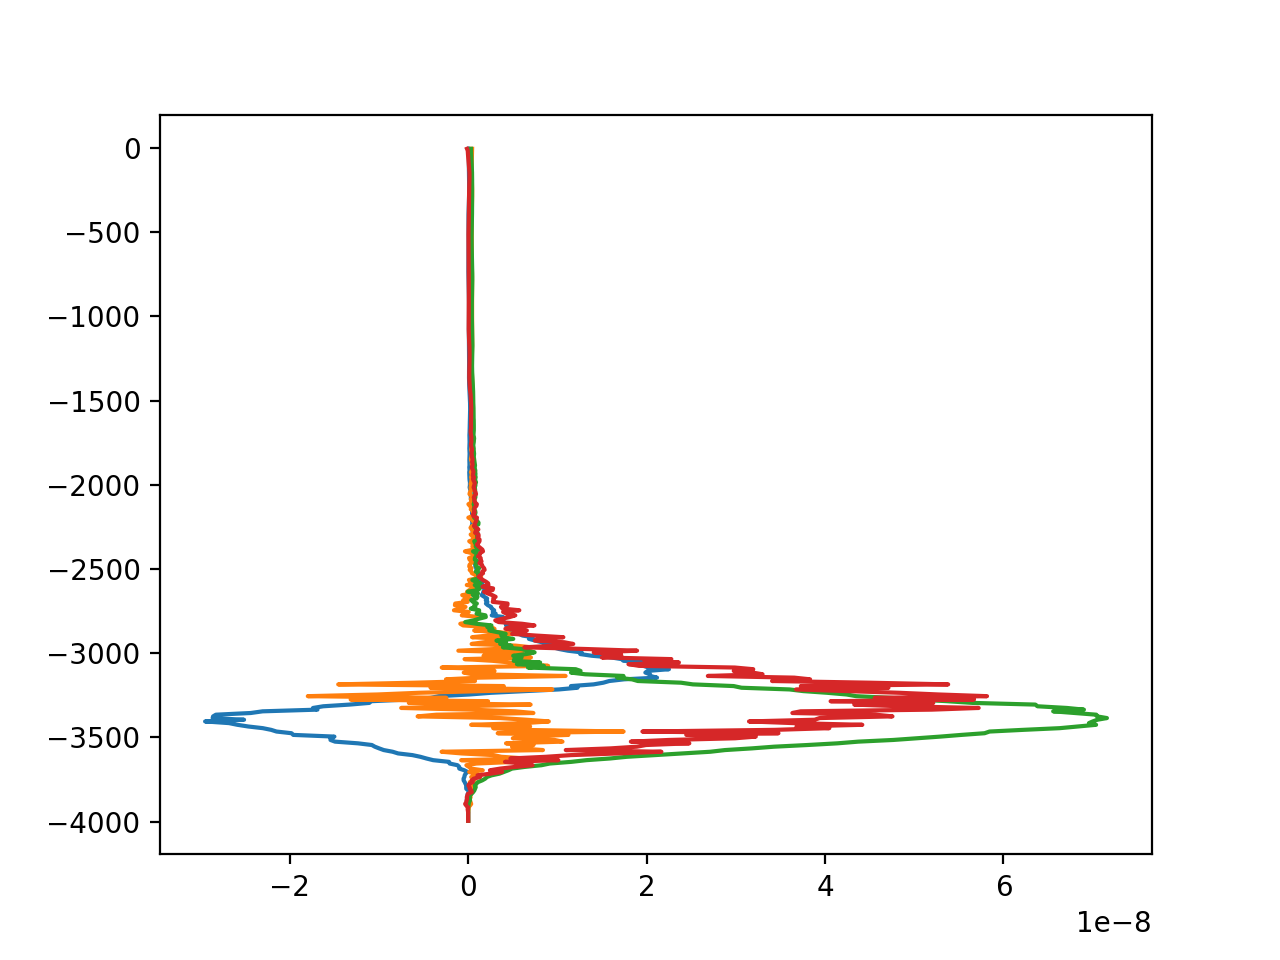

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
12.317005052199114


<IPython.core.display.Javascript object>


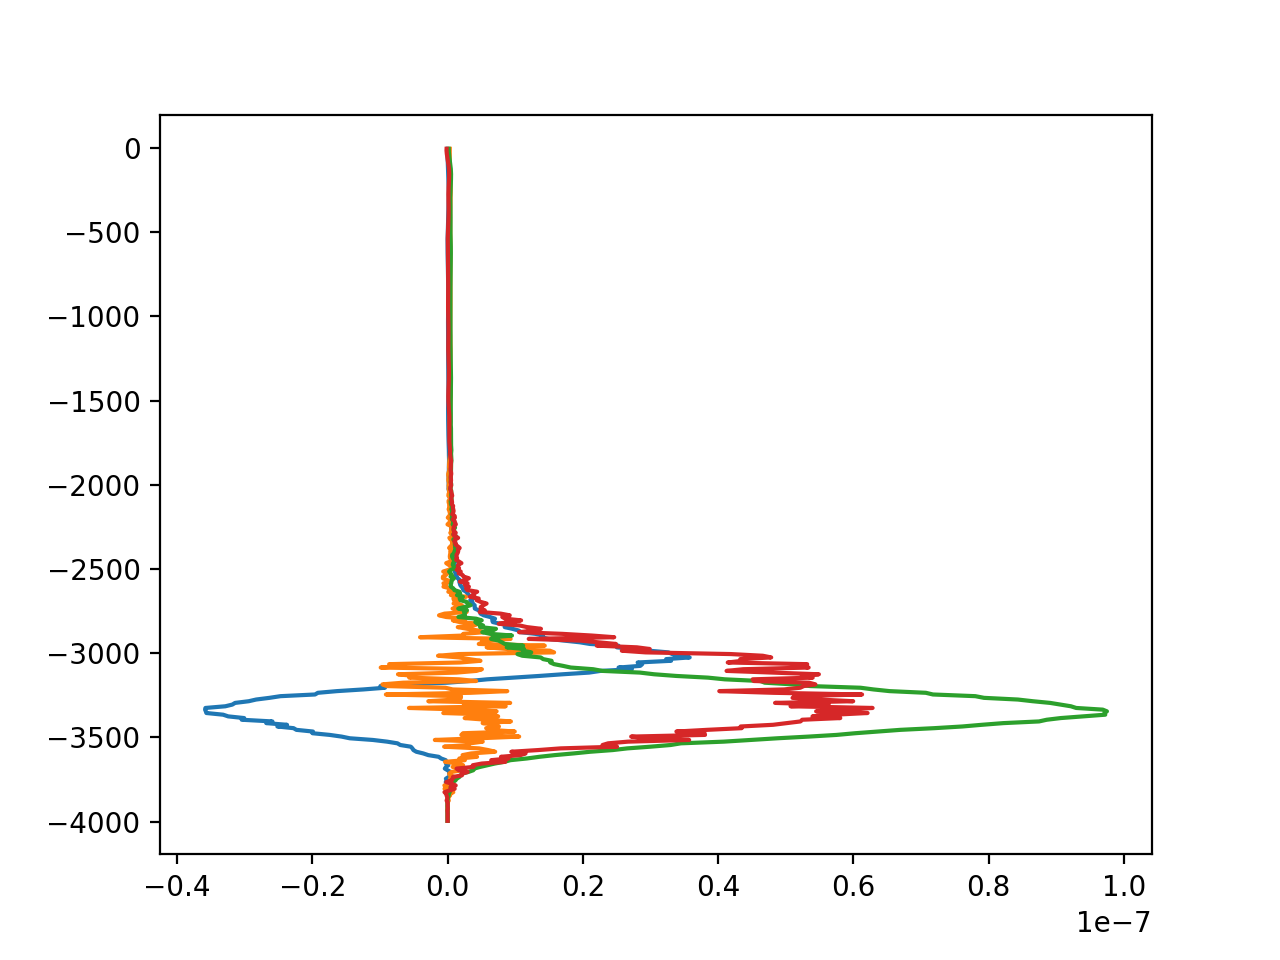

In [13]:
Ks = np.array([10, 18, 36])
Bf = 0. * Ks
for num, k in enumerate(Ks):
    
    with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp305K%02dL18.nc' % k) as en:
        print(en)
        print(-en.dWPdz.sum().values * 10)
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))


<IPython.core.display.Javascript object>


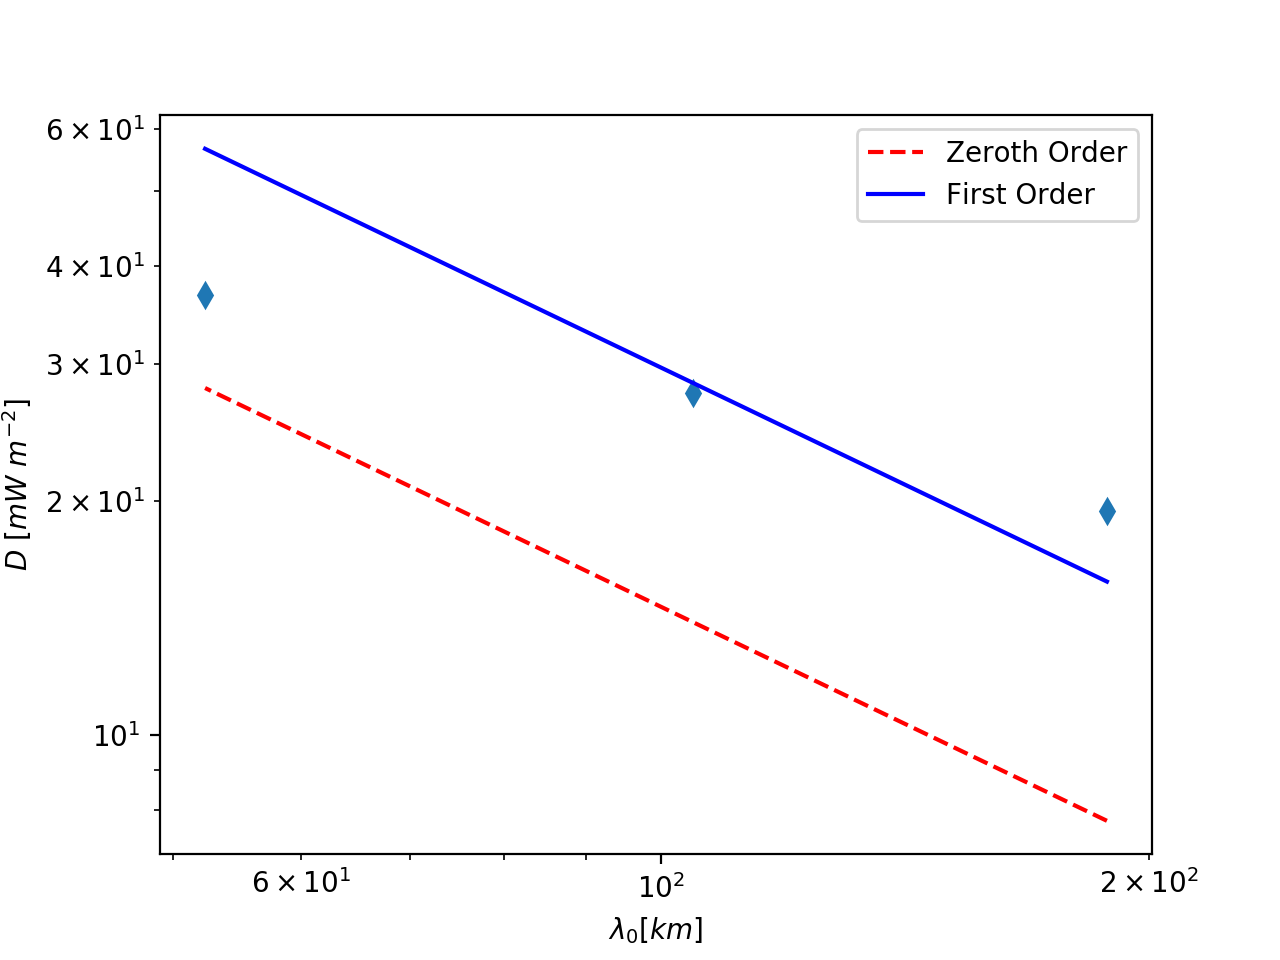

[188495.55921539 104719.75511966  52359.87755983]


In [22]:
fig, ax = plt.subplots()
k = Ks * 1e-4 / 10
lam =  2* np.pi / k * 3
ax.loglog(lam/1e3, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
N = 1e-3
U0 = 0.1
print(lam)
amps = 305
guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / lam
ax.loglog(lam/1e3, guess0, 'r--', label='Zeroth Order')

UNh = U0 / N / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.loglog(lam/1e3, guess1, 'b', label='First Order')
ax.set_xlabel('$\lambda_0 [km]$')
ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.legend()

<IPython.core.display.Javascript object>


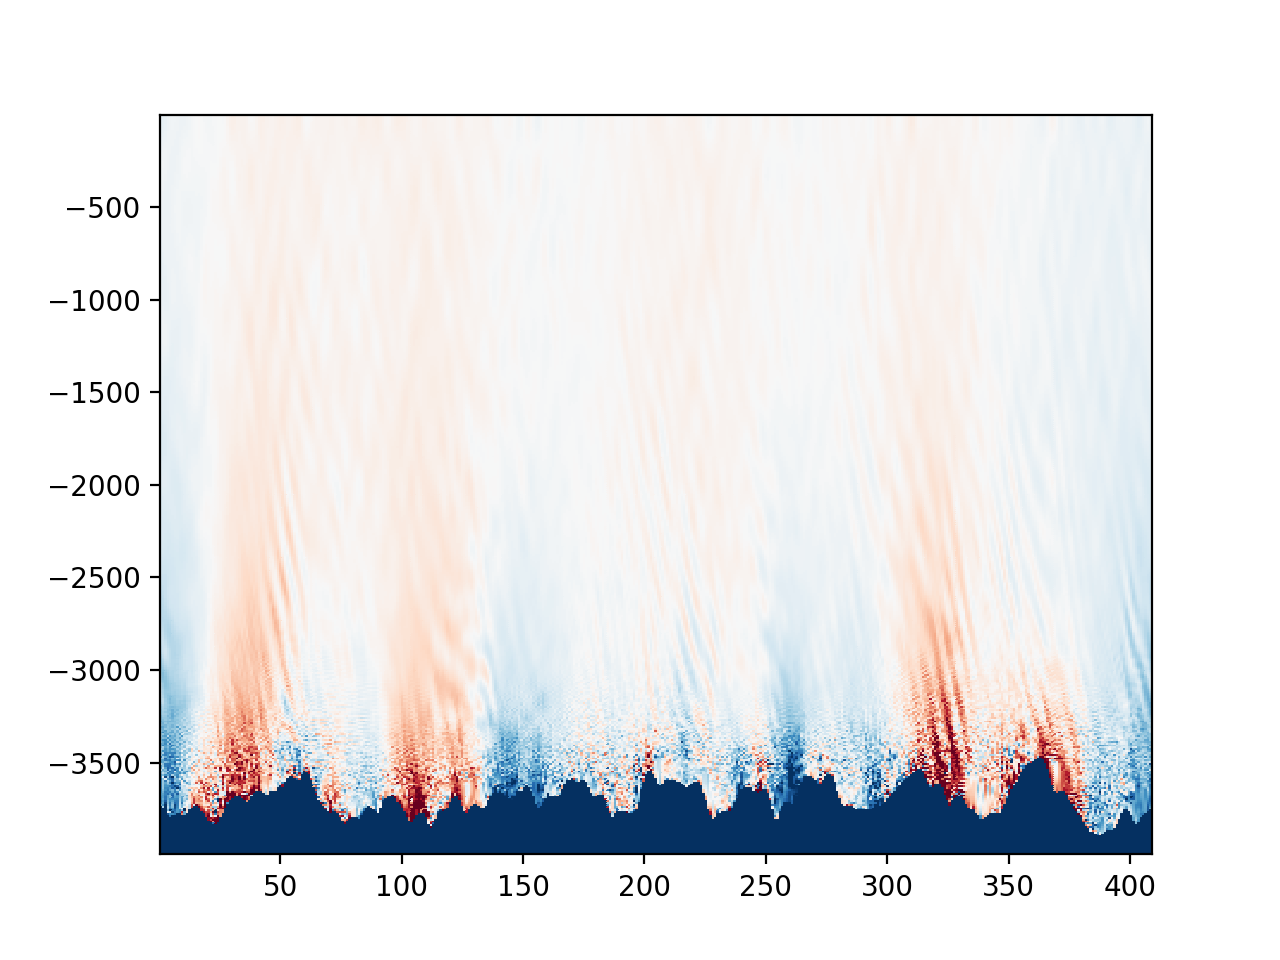

In [48]:
with xr.open_dataset('../results/final.nc', chunks={'j': 10, 'j_g': 10}) as dss:
    fig, ax = plt.subplots()
    d = dss.isel(j=70, record=1)
    ax.pcolormesh(d.XC/1e3, d.Z, d.UVEL-0.1, vmin = -0.1, vmax=0.1, cmap='RdBu_r')
    

<IPython.core.display.Javascript object>


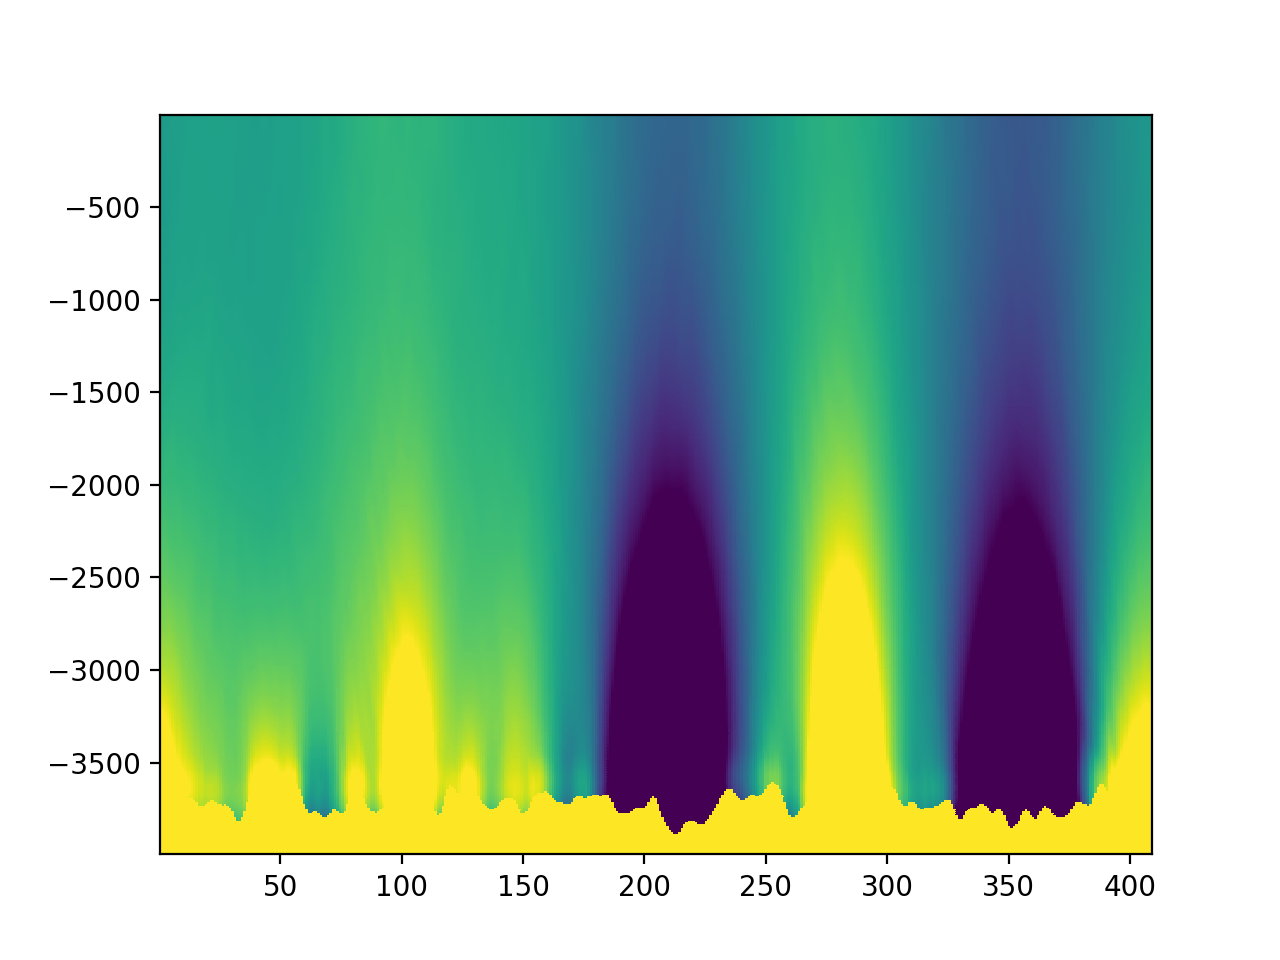

In [33]:
with xr.open_dataset('../results/final.nc', chunks={'j': 10, 'j_g': 10}) as dss:
    fig, ax = plt.subplots()
    d = dss.isel(j=0, record=1)
    ax.pcolormesh(d.XC/1e3, d.Z, d.PHIHYD, vmin=-0.04, vmax=0.04)

<IPython.core.display.Javascript object>


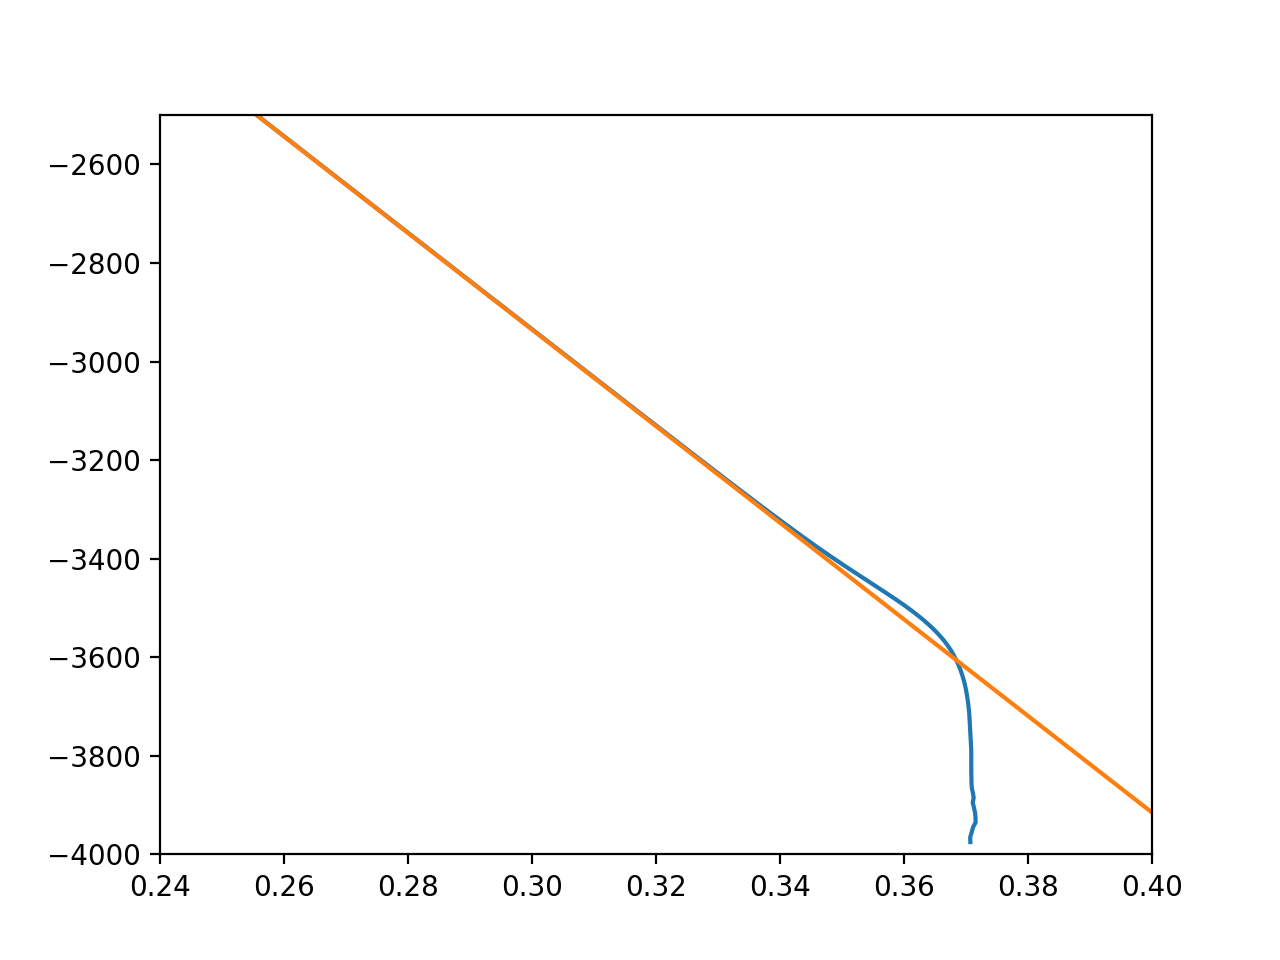

<xarray.DataArray 'THETA' (k: 400, j: 128, i: 416)>
dask.array<variadic_choose, shape=(400, 128, 416), dtype=float64, chunksize=(400, 10, 416)>
Coordinates:
    record   int32 1
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    XC       (j, i) float64 492.3 1.477e+03 2.462e+03 3.446e+03 4.431e+03 ...
    YC       (j, i) float64 462.5 462.5 462.5 462.5 462.5 462.5 462.5 462.5 ...
Attributes:
    description:  Potential Temperature
    units:        degC


/Users/jklymak/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [59]:
with xr.open_dataset('../results/final.nc', chunks={'j': 10, 'j_g': 10, 'record': 1}) as dss:
    fig,ax = plt.subplots()
    T = dss.THETA.isel(record=0)
    T = T.where(T>0)
    print(T)
    N0=1e-3
    g=9.8
    alpha = 2e-4
    nz = dss['Z'].size
    dz=4000/nz
    T0 = 28-np.cumsum(N0**2/g/alpha*dz*np.ones(nz))
    ax.plot(((T).mean(dim = ('i', 'j')) - 28.0) * -0.2, dss.Z)
    ax.plot((T0 - 28.0) * -0.2, dss.Z)
    ax.set_ylim([-4000, -2500])
    ax.set_xlim([0.24, 0.4])

<IPython.core.display.Javascript object>


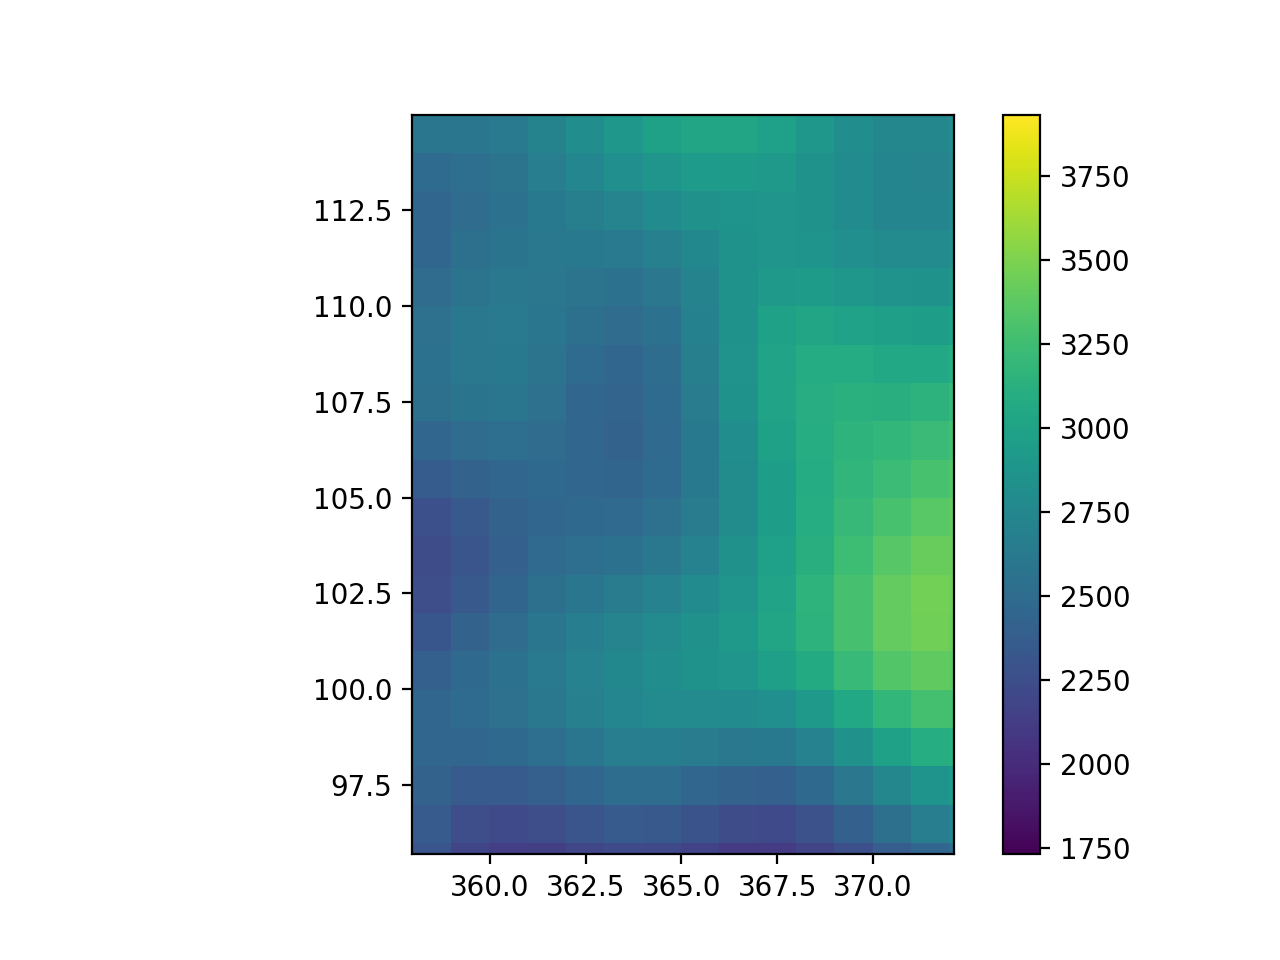

In [19]:
with xr.open_dataset('../reduceddata/SliceZ2000.nc') as dss:
    fig,ax = plt.subplots()
    p = ax.pcolormesh(dss.Depth)
    ax.set_aspect(1.)
    fig.colorbar(p, ax = ax)

<IPython.core.display.Javascript object>


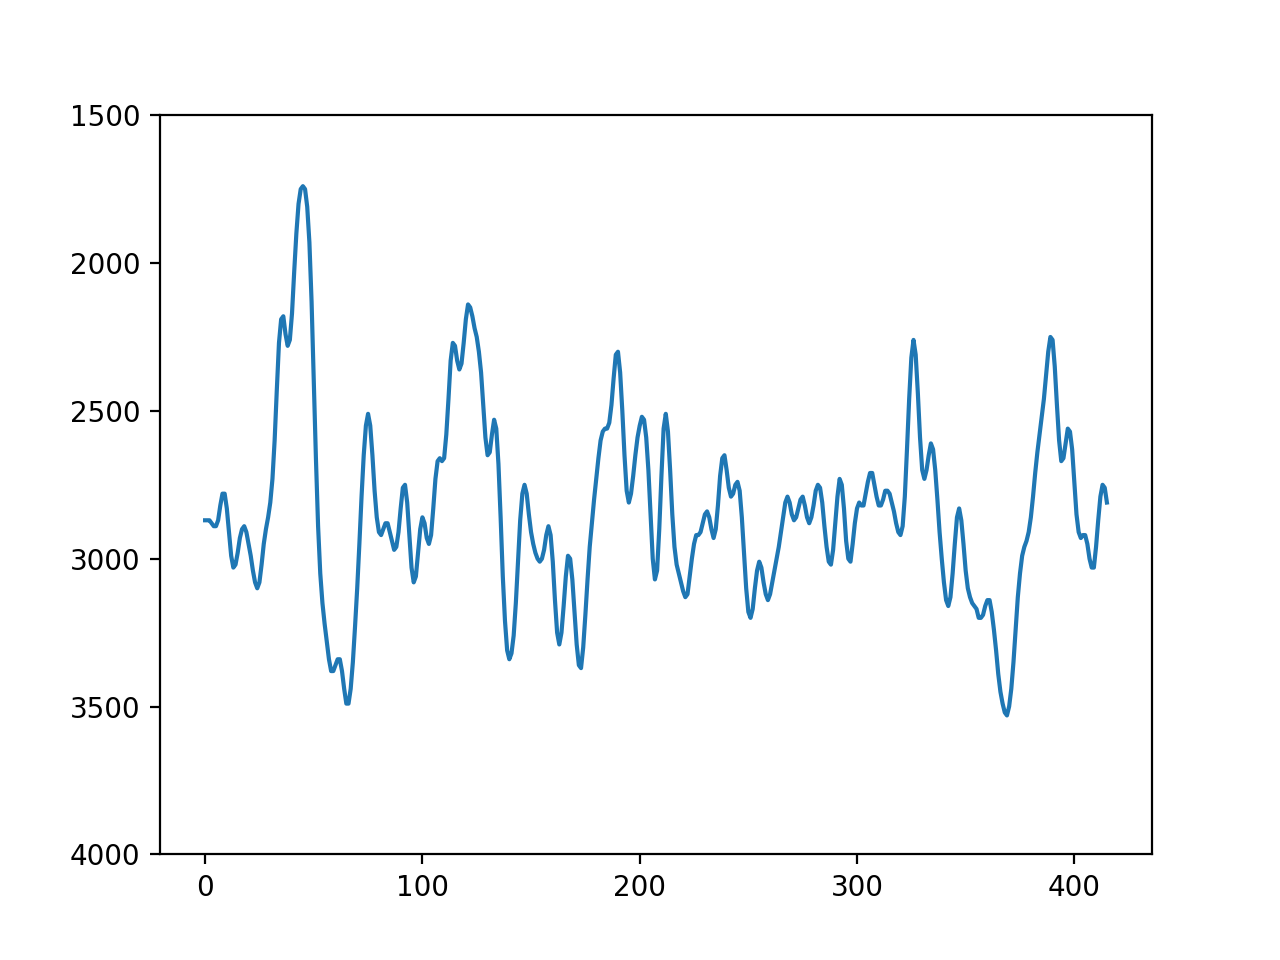

In [17]:
with xr.open_dataset('../reduceddata/SliceZ2000.nc') as dss:
    fig,ax = plt.subplots()
    ax.plot(dss.Depth[50,:])
    ax.set_ylim([4000, 1500])

<IPython.core.display.Javascript object>


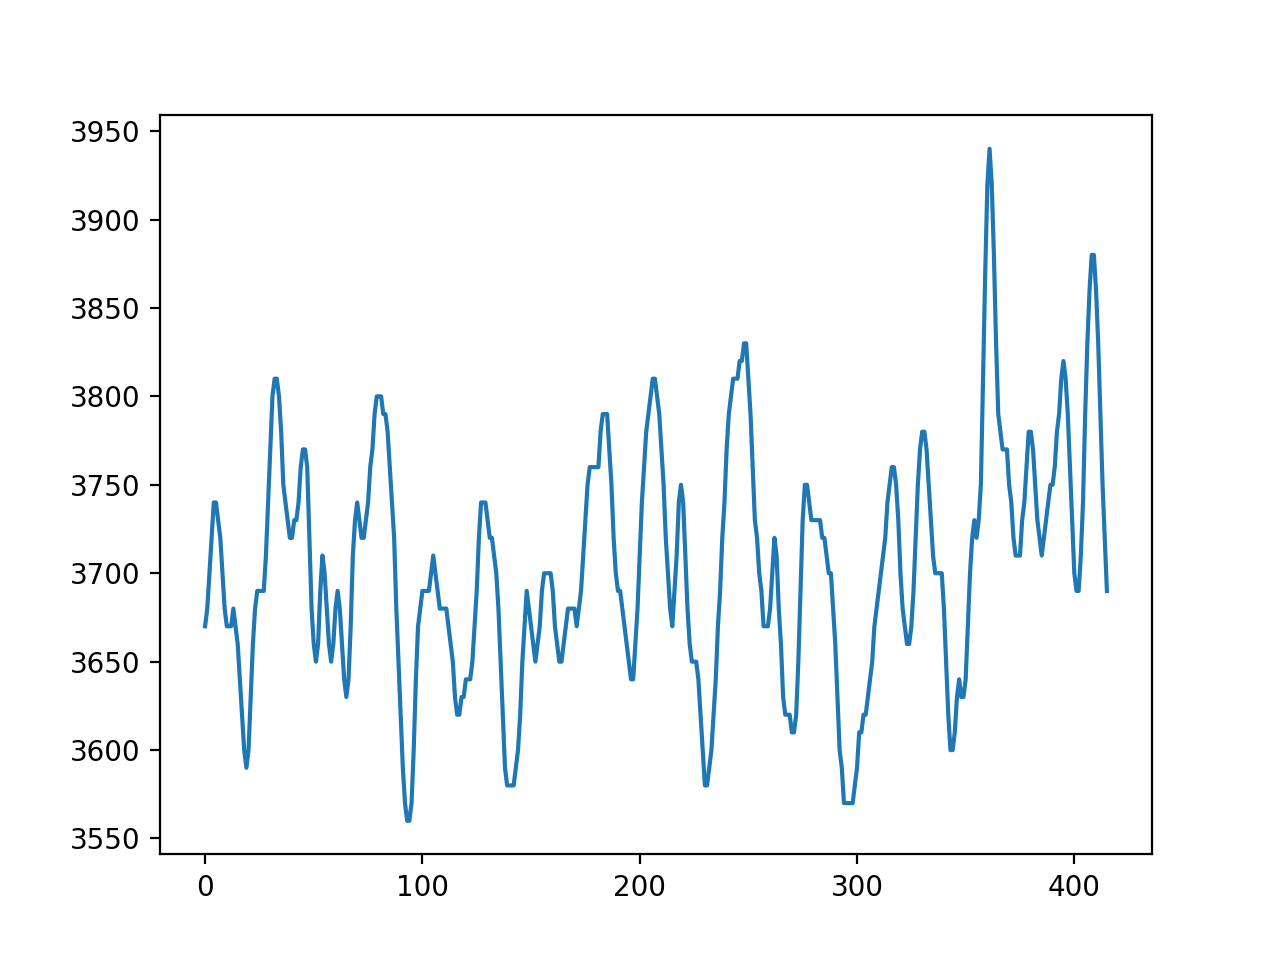

In [60]:
with xr.open_dataset('../results/spinup2d.nc', chunks={'j': 10, 'j_g': 10}) as dss:
    fig,ax = plt.subplots()
    ax.plot(dss['Depth'][20,:])

In [65]:
# make top spectrum
import scipy.signal as scisig
pp = 0
with xr.open_dataset('../results/spinup2d.nc', chunks={'j': 10, 'j_g': 10}) as dss:
    for j in range(dss.j.size):
        f, p = scisig.welch(dss.Depth[j,:], fs = 1., nfft=dss.i.size, noverlap=0)
        pp += p

<IPython.core.display.Javascript object>


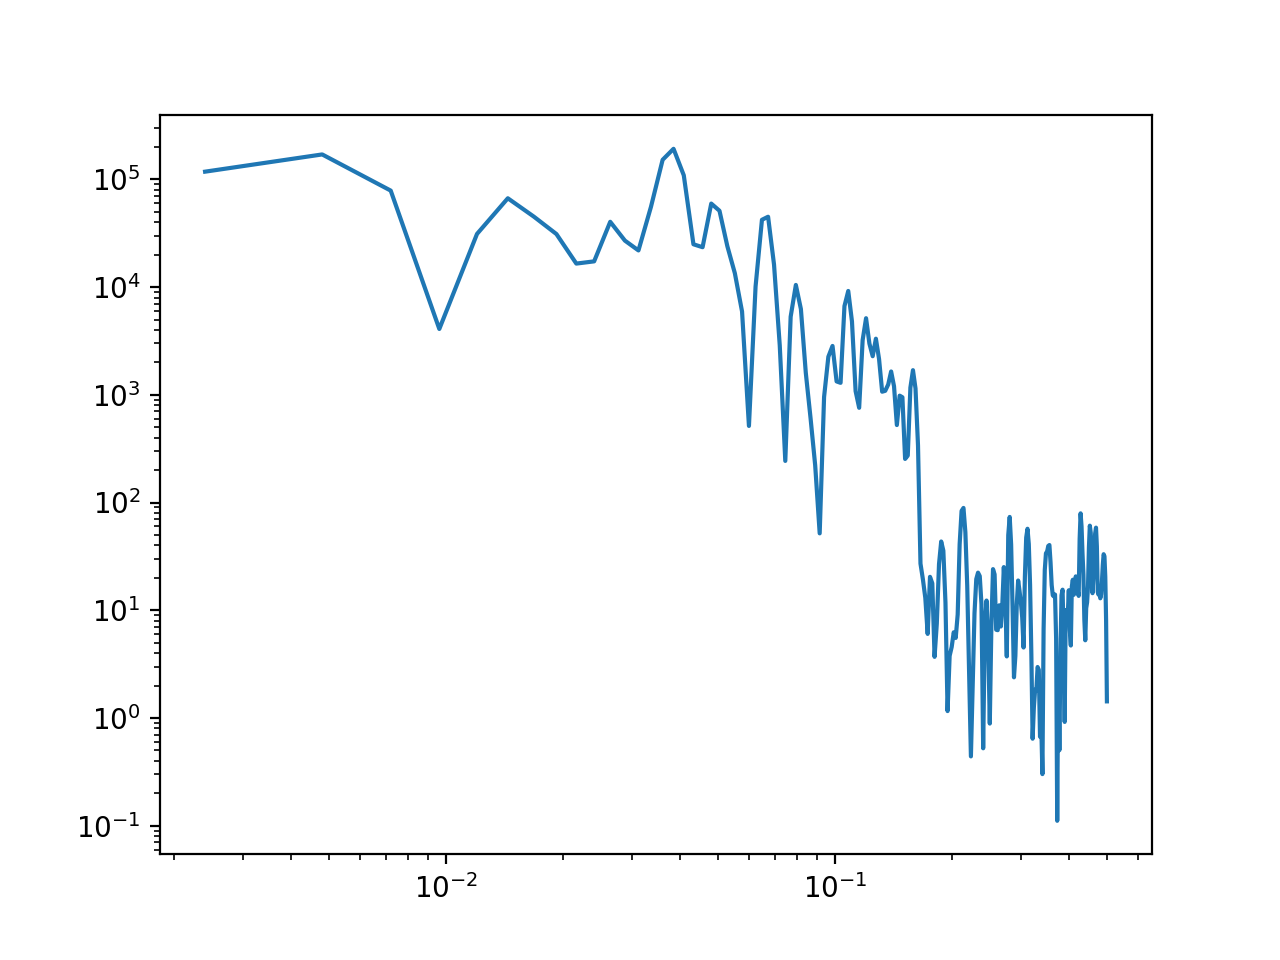

In [66]:
fig, ax = plt.subplots()
ax.loglog(f, p)

In [84]:
a = np.array([1e34], dtype=np.float64)
b = np.array([5.e19], dtype=np.float64)
c = a-b
d = c-a
print(d)

[ -4.95756247e+19]


In [66]:
b = a-5.0
print(b-a)

[ 0.]
